# Isotonic Regression

Isotonic regression or monotonic regression is the technique of fitting a free-form line to a sequence of observations such that the fitted line is non-decreasing (or non-increasing) everywhere, and lies as close to the observations as possible. (Wikipedia)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [5]:
n = len(dataset['Adj Close'])
X = np.array(dataset['Open'].values)
y = dataset['Adj Close'].values

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression

In [7]:
ir=IsotonicRegression()
y_ir=ir.fit_transform(X,y)

Text(0.5, 1.0, 'Isotonic Regression')

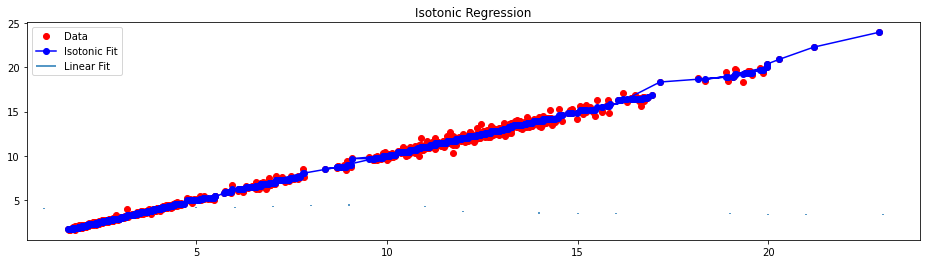

In [8]:
lines=[[[i,y[i]],[i,y_ir[i]]] for i in range(n)]
lc=LineCollection(lines)
plt.figure(figsize=(16,4))
plt.plot(X,y,'r.',markersize=12)
plt.plot(X,y_ir,'b.-',markersize=12)
plt.gca().add_collection(lc)
plt.legend(('Data','Isotonic Fit','Linear Fit'))
plt.title("Isotonic Regression")

In [9]:
ir.score(X, y)

0.9982775188322193

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.4, random_state=101)

In [11]:
ir.fit(X_train,y_train)

IsotonicRegression()

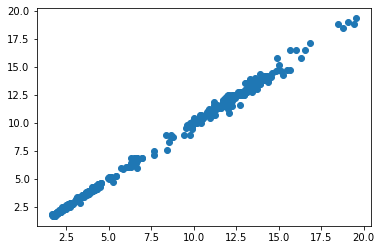

In [12]:
predictions = ir.predict(X_test)
plt.scatter(y_test,predictions)

In [13]:
y_pred = ir.predict(X_test)

In [14]:
y_pred

array([ 4.06250012,  2.32555548,  9.98166672, 13.85857146, 13.04999992,
        6.81648221, 11.86472333, 11.1049993 ,  4.57499993,  3.69000006,
        2.63333337,  7.13577886, 13.40666713, 12.80058822,  2.28799996,
       13.66025007, 11.38999998, 13.66399994, 15.84166688,  3.64000005,
        6.01432434, 11.64375007, 10.87000036,  3.70333338,  4.31444499,
       12.01166654,  6.87888892,  2.82999992,  2.63333337,  2.12499959,
        2.60499998, 18.82657537, 11.38999998,  4.6165911 ,  3.77000001,
       11.64375007,  4.27666672, 13.51454535,  3.81999993,  1.86374998,
        8.75904421,  1.95285714,  6.06054062,  3.95666671,  2.28799996,
       19.36666679,  2.74923076, 10.48666684, 10.70714269,  2.74923076,
       12.80058822,  2.41666667,  3.96200006,  2.32555548,  4.25699997,
        2.72000003, 12.80058822,  7.47285713,  3.64000005,  3.62333337,
       14.16899986, 13.85857146,  2.74923076,  1.95285714,  2.51999998,
       11.20750022, 14.05122406, 13.51454535,  7.58500004, 17.17

In [15]:
y_pred[np.isnan(y_pred)] = 0

In [16]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.137100655612605


In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.20616241947056094
MSE: 1.2929979009946162
RMSE: 1.137100655612605
